# Exploratory Data Analysis

In [5]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load data
df = pd.read_excel("../data/raw/Telco_customer_churn_adapted_v2.xlsx")

## Univariate Analysis

In [7]:
df.describe()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,84.190200,107.043246,-6.404184,5720.384481
std,2033.283305,24.559481,39.117061,0.358316,0.322898,1537.974298
min,0.000000,0.000000,23.725000,106.816666,-6.914744,2603.900000
25%,1760.500000,9.000000,46.150000,106.816666,-6.914744,4509.700000
50%,3521.000000,29.000000,91.455000,106.816666,-6.200000,5885.100000
75%,5281.500000,55.000000,116.805000,107.609810,-6.200000,6994.650000
max,7042.000000,72.000000,154.375000,107.609810,-6.200000,8450.000000


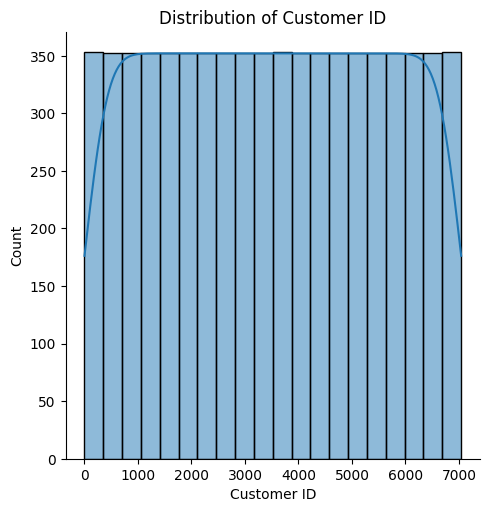

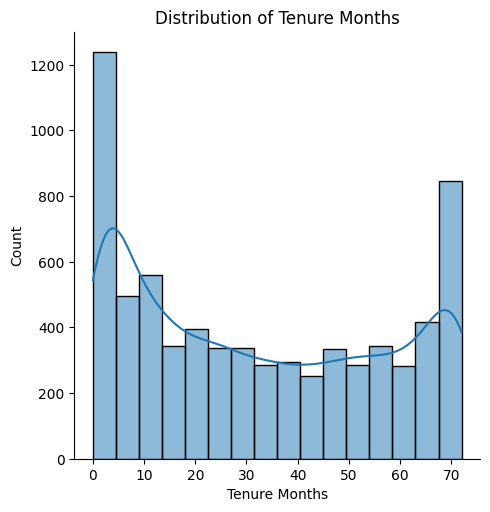

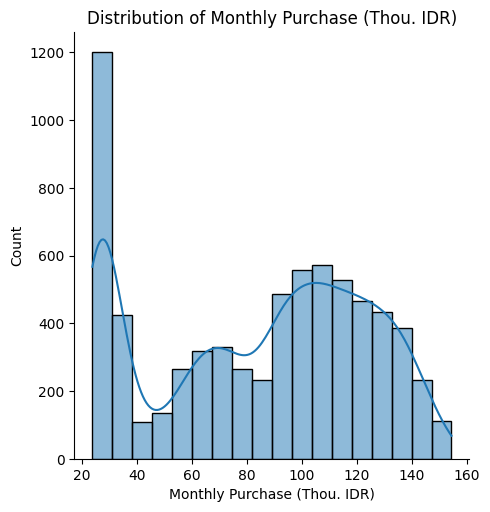

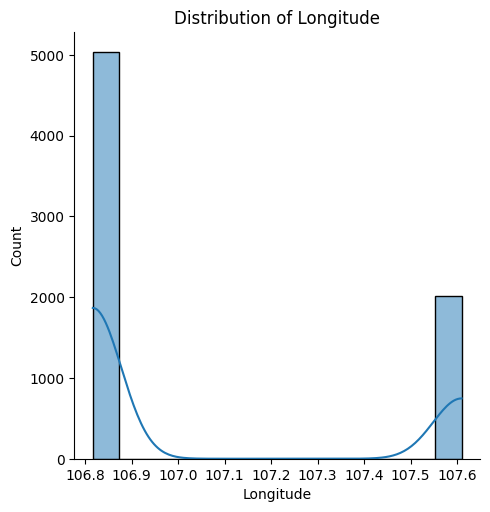

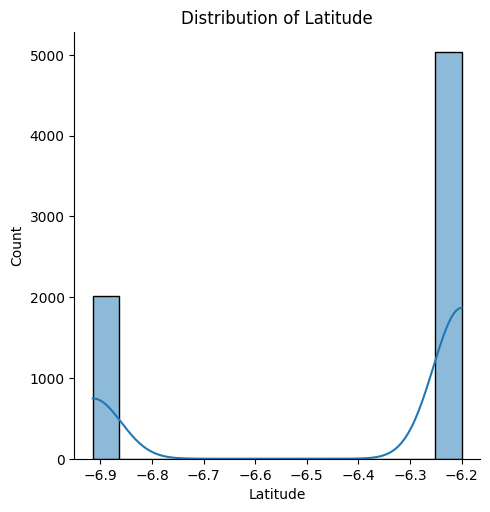

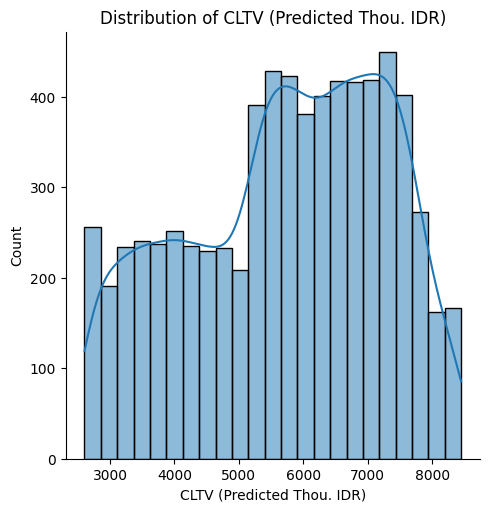

In [8]:
for c in df.select_dtypes(include=['float', 'int']):
    ax = sns.displot(df[c], kde=True)
    ax.set(title=f"Distribution of {c}")
    plt.show()

`Tenure Months`, `Monthly Purchase (Thou. IDR)` and `CLTV (Predicted Thou. IDR)` forms a bimodal distibution which indicate that there's are two distinct groups.

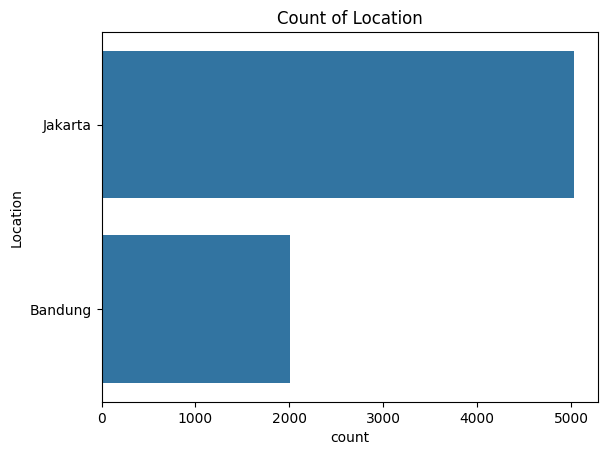

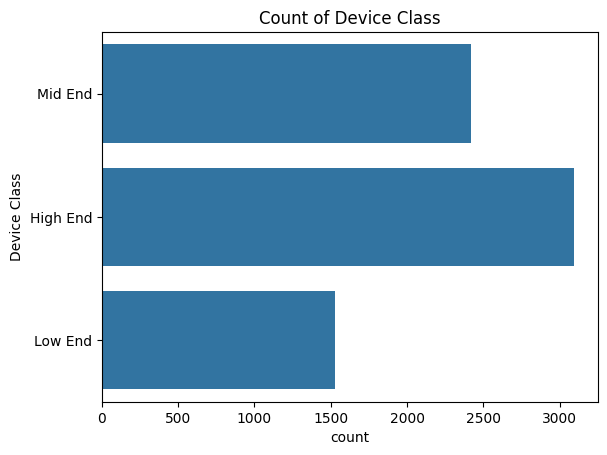

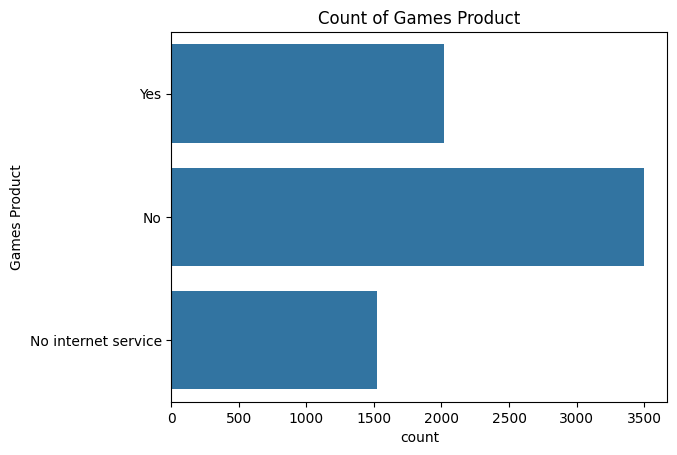

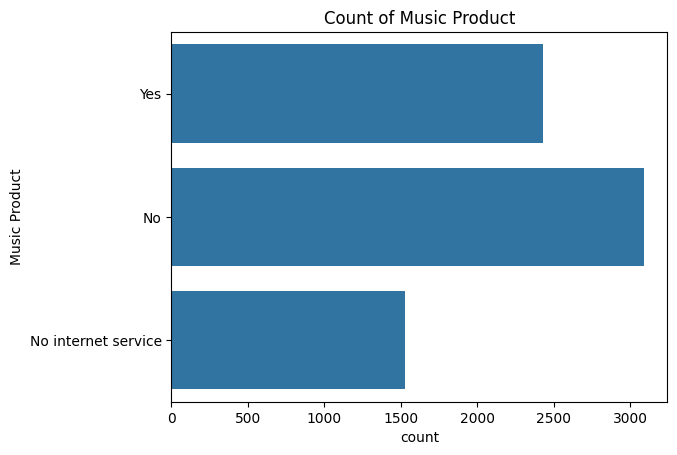

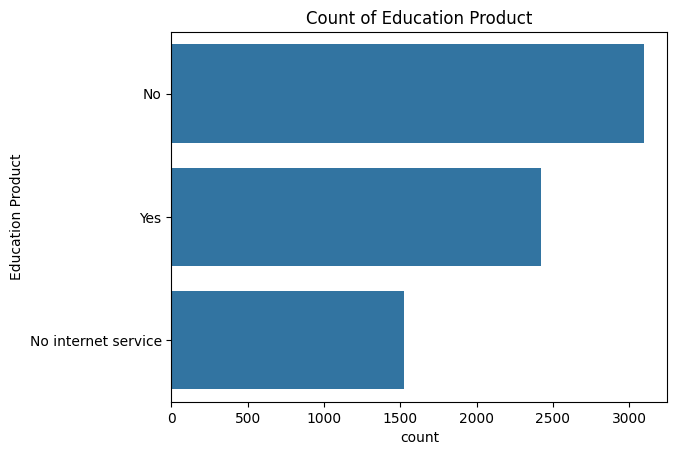

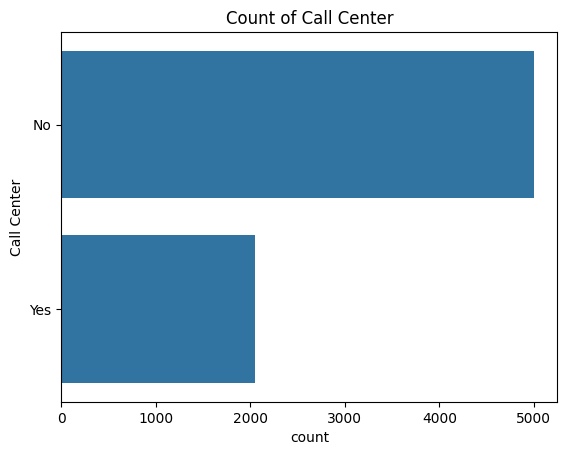

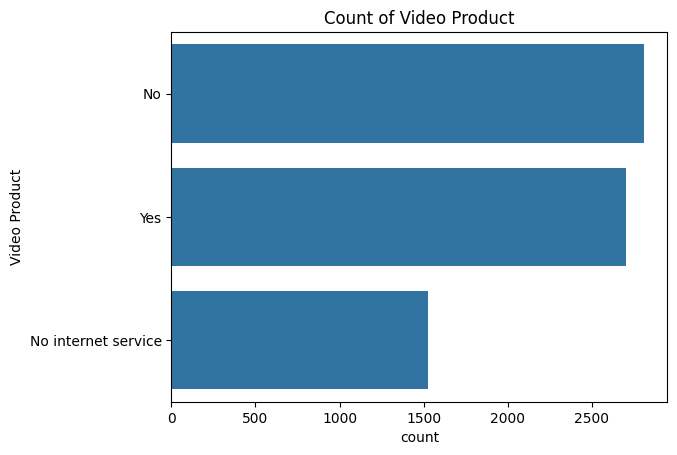

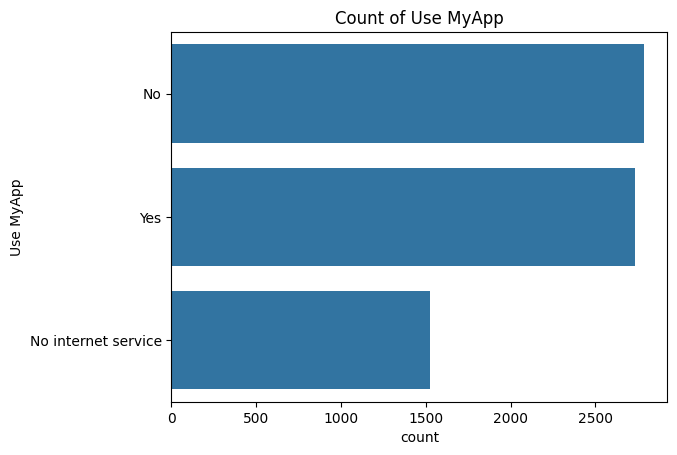

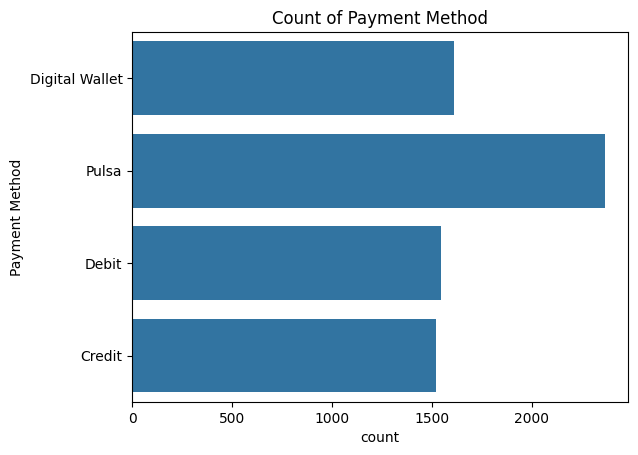

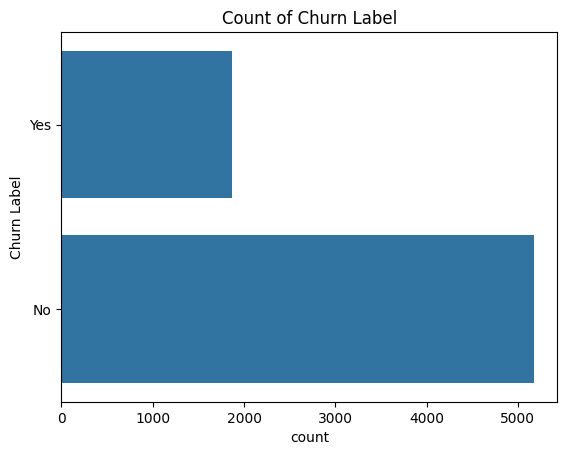

In [9]:
for c in df.select_dtypes(include=['object']):
    ax = sns.countplot(df[c])
    ax.set(title=f"Count of {c}")
    plt.show()

## Bivariate Analysis

Questions to ask
1. How many `Device Class` are there in each services (`Games Product`, `Music Product`, `Education Product`, `Video Product`, and `Use MyApp`)?
2. Does having a higher class device really correlates with high `Monthly Purchase`?
3. Does having a higher class device really correlates with high `CLTV`?
4. Does having a longer `Tenure Months` really correlates with high `CLTV`?
5. Does having a high `Monthly Purchase (Thou. IDR)` really correlates with high `CLTV`?

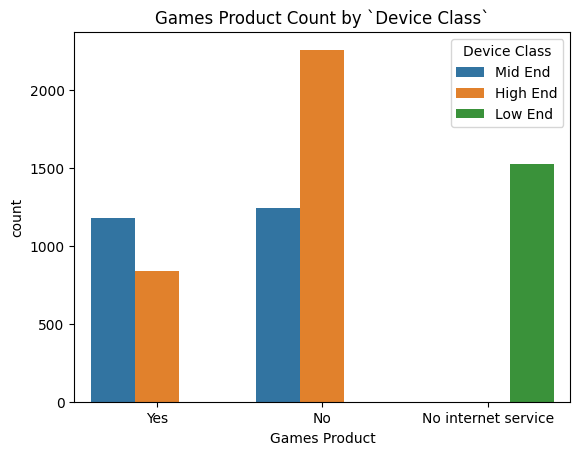

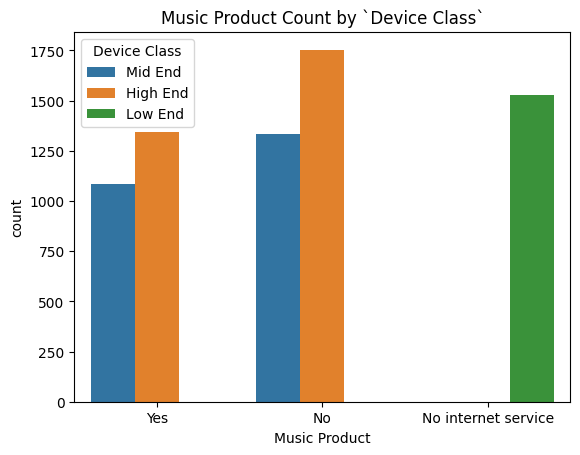

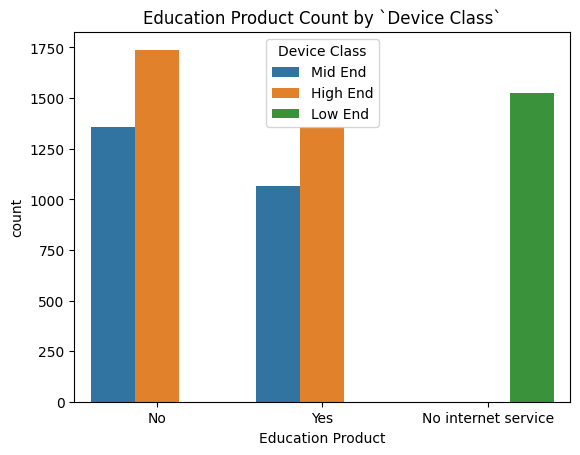

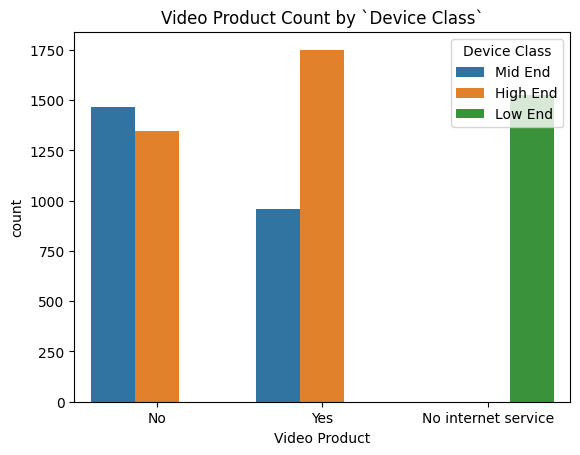

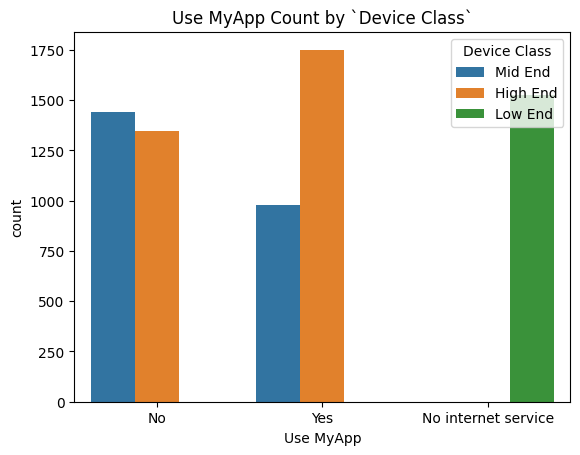

In [10]:
for c in ['Games Product', 'Music Product', 'Education Product', 'Video Product', 'Use MyApp']:
    ax = sns.countplot(data=df, x=c, hue='Device Class')
    ax.set(title=f"{c} Count by `Device Class`")
    plt.show()

**Low End Device** users never used internet services, while some **Mid End and High End Device** users used internet services.

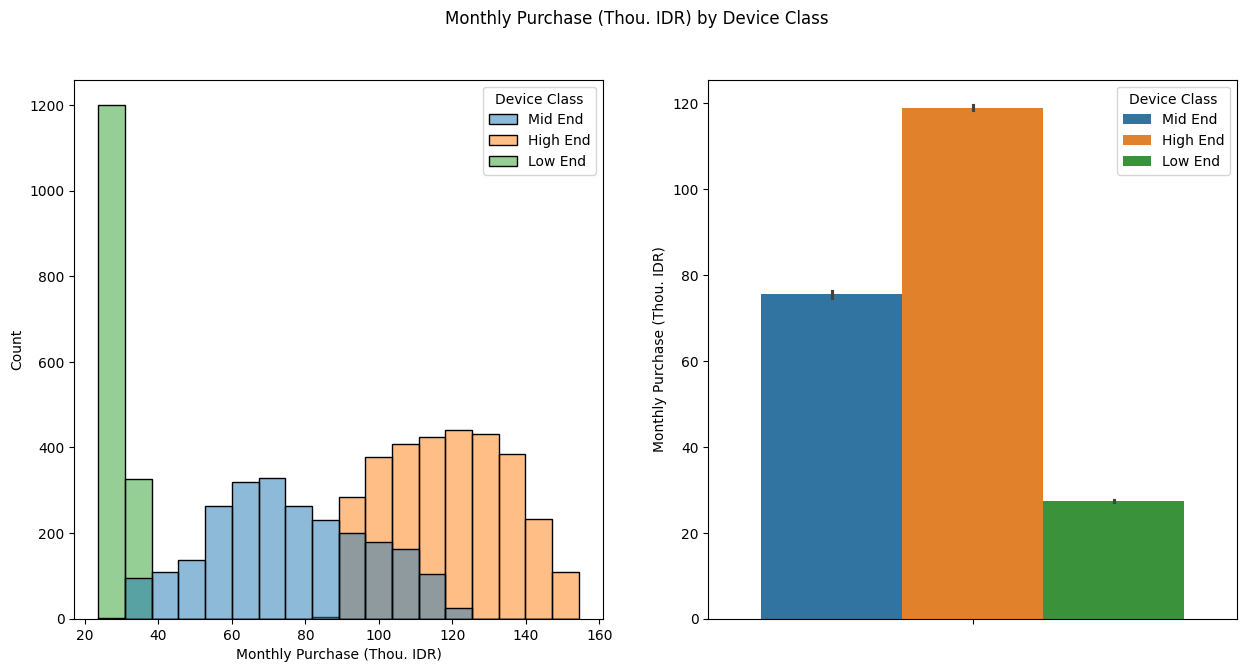

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=df, x='Monthly Purchase (Thou. IDR)', hue='Device Class', ax=ax[0])
sns.barplot(data=df, y='Monthly Purchase (Thou. IDR)', hue='Device Class', ax=ax[1])
fig.suptitle('Monthly Purchase (Thou. IDR) by Device Class')
plt.show()

Without question that Monthly purchases differs based on how high their device class is. The higher the device class the greate the monthly purchase.

Does Device Class Determine the CLTV?

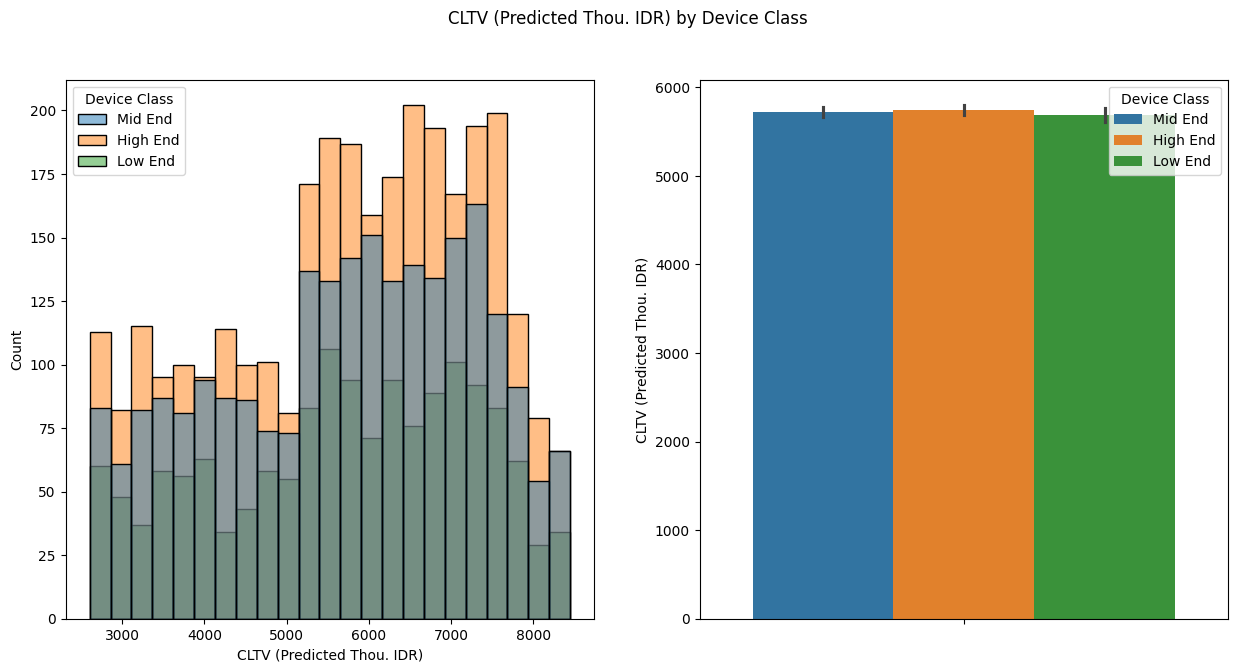

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=df, x="CLTV (Predicted Thou. IDR)", hue="Device Class", ax=ax[0])
sns.barplot(data=df, y="CLTV (Predicted Thou. IDR)", hue="Device Class", ax=ax[1])
fig.suptitle("CLTV (Predicted Thou. IDR) by Device Class")
plt.show()

The `CLTV (Predicted Thou. IDR)` is not determined by the `Device Class`.

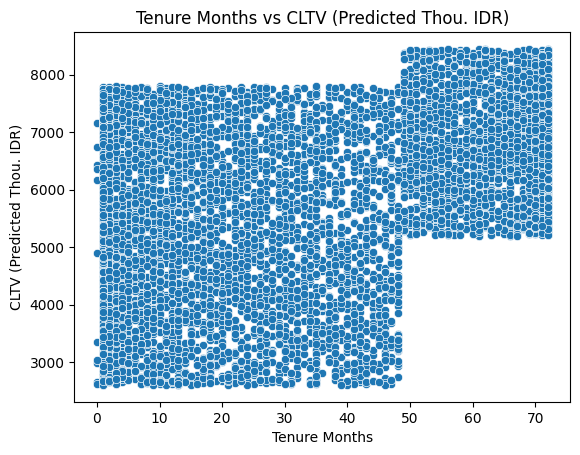

In [13]:
ax=sns.scatterplot(data=df, x="Tenure Months", y="CLTV (Predicted Thou. IDR)")
ax.set(title="Tenure Months vs CLTV (Predicted Thou. IDR)")
plt.show()

There's some threshold of tenure months where the range of values shifted from **3000-8000** to **5000-9000**.

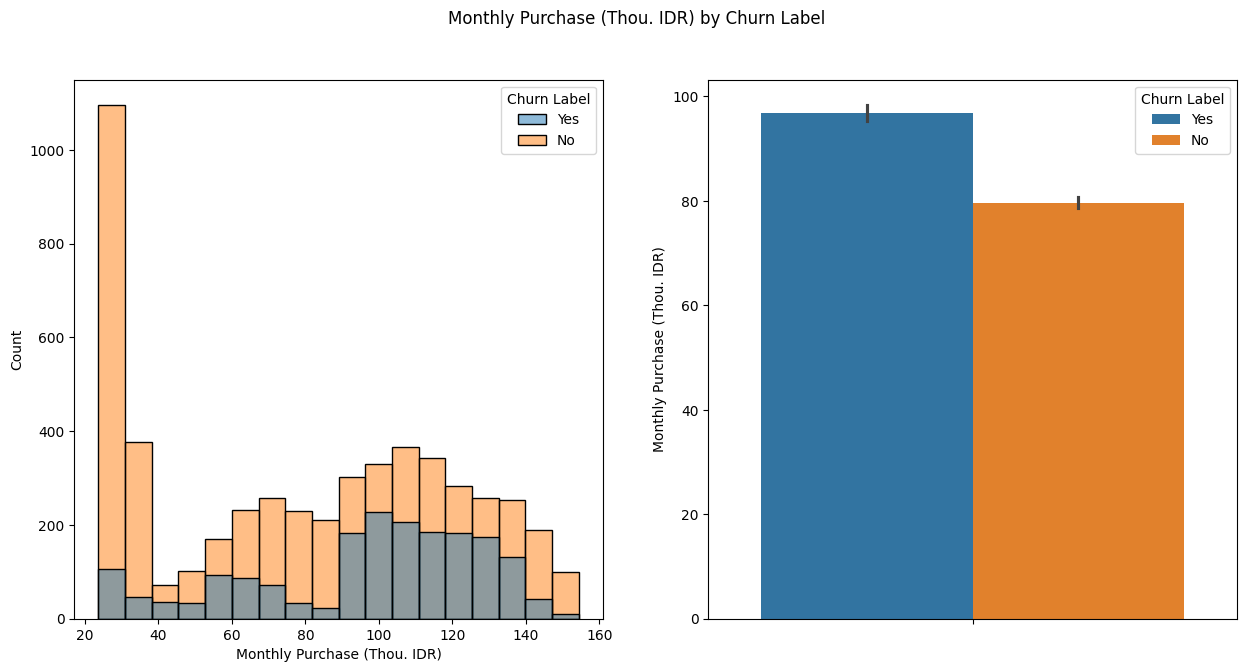

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=df, x='Monthly Purchase (Thou. IDR)', hue='Churn Label', ax=ax[0])
sns.barplot(data=df, y='Monthly Purchase (Thou. IDR)', hue='Churn Label', ax=ax[1])
fig.suptitle('Monthly Purchase (Thou. IDR) by Churn Label')
plt.show()

`Monthly Purchase (Thou. IDR)` doesn't influence the Churn of customers.

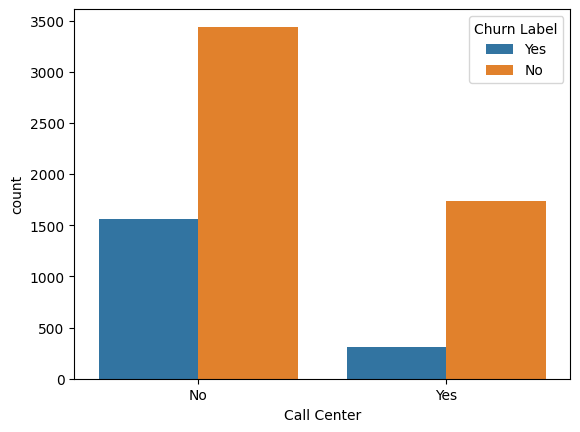

In [15]:
sns.countplot(data=df, x='Call Center', hue='Churn Label')
plt.show()

Calling the call center doesn't mean they will churn.

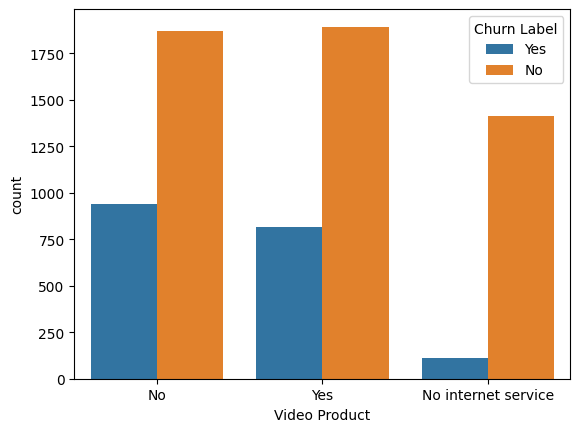

In [63]:
sns.countplot(data=df, x='Video Product', hue='Churn Label')
plt.show()

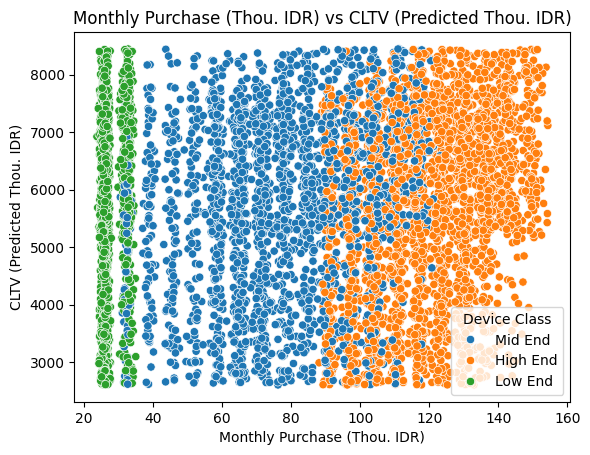

In [18]:
ax=sns.scatterplot(data=df, x="Monthly Purchase (Thou. IDR)", y="CLTV (Predicted Thou. IDR)", hue='Device Class')
ax.set(title="Monthly Purchase (Thou. IDR) vs CLTV (Predicted Thou. IDR)")
plt.show()

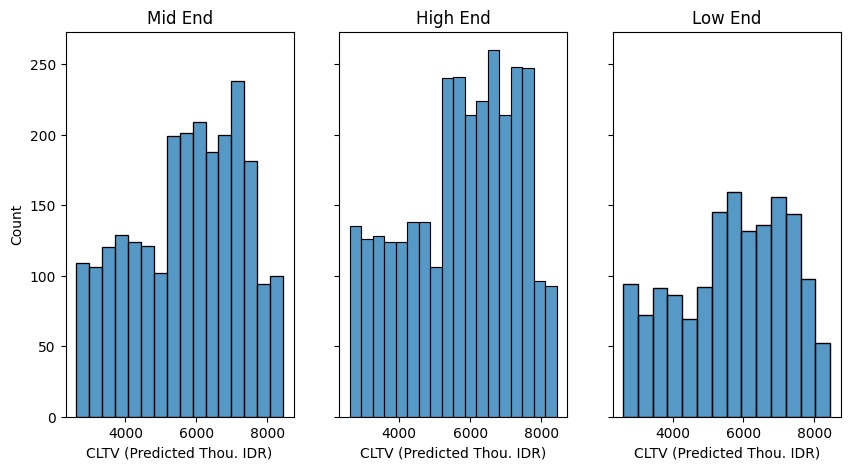

In [24]:
fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(10, 5))
for i, device_class in enumerate(df['Device Class'].unique()):
    sns.histplot(data=df[df['Device Class']==device_class], x="CLTV (Predicted Thou. IDR)", ax=ax[i])
    ax[i].set_title(device_class)
plt.show()

<Axes: xlabel='Use MyApp'>

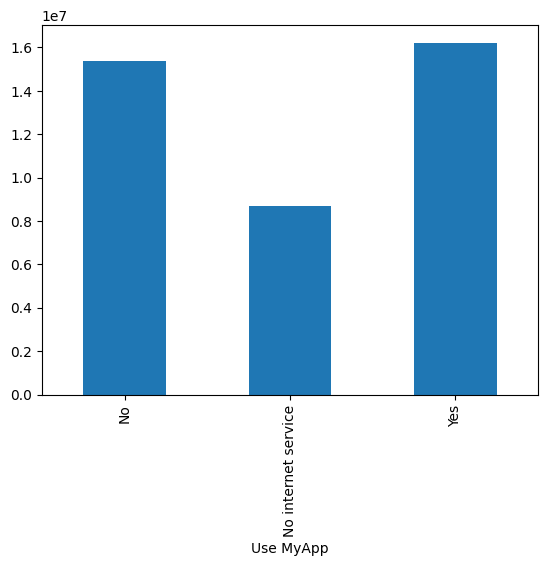

In [37]:
df.groupby('Use MyApp')['CLTV (Predicted Thou. IDR)'].sum().plot.bar()